In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(18813823)
n_sim = 5
rv = stats.poisson(mu=5.0)
sample = rv.rvs(size=n_sim)
df_unitary = pd.DataFrame({"id": np.arange(len(sample)), "value": sample})
sample_weight = stats.randint.rvs(0, 300, size=df_unitary.shape[0])
df_unitary

,id,value
0,0,4
1,1,4
2,2,3
3,3,2
4,4,7


In [5]:
X_resampled_by_weights = np.repeat(df_unitary.values, sample_weight, axis=0)
df_weighted = pd.DataFrame(
    {
        "id": df_unitary["id"].values,
        "weight": sample_weight,
        "value": sample,
    }
)
df_unitary = pd.DataFrame(
    {
        "id": X_resampled_by_weights[:, 0],
        "weight": 1,
        "value": X_resampled_by_weights[:, 1],
    }
)
display(df_weighted)
display(df_unitary)

,id,weight,value
0,0,272,4
1,1,2,4
2,2,108,3
3,3,214,2
4,4,18,7


,id,weight,value
0,0,1,4
1,0,1,4
2,0,1,4
3,0,1,4
4,0,1,4
...,...,...,...
609,4,1,7
610,4,1,7
611,4,1,7
612,4,1,7


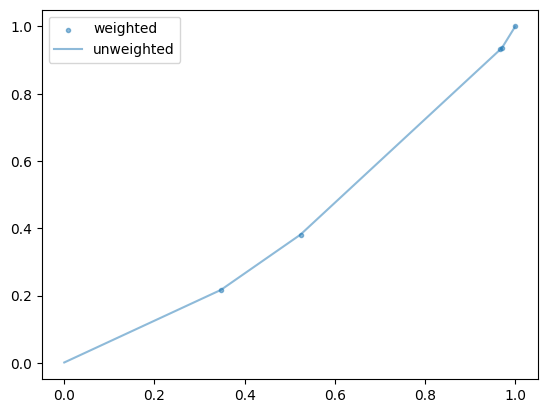

In [6]:
def lorenz_curve(frequency, exposure, weighted=True):
    ranking = np.argsort(frequency)
    ranked_frequencies = frequency[ranking]
    ranked_exposure = exposure[ranking]
    cumulated_claims = np.cumsum(ranked_frequencies * ranked_exposure)
    cumulated_claims = cumulated_claims / cumulated_claims[-1]
    if weighted:
        cumulated_exposure = np.cumsum(ranked_exposure)
        cumulated_exposure = cumulated_exposure / cumulated_exposure[-1]
        plt.scatter(
            cumulated_exposure,
            cumulated_claims,
            marker=".",
            alpha=0.5,
            label="weighted",
        )
    else:
        cumulated_exposure = np.linspace(0, 1, len(frequency))
        plt.plot(
            cumulated_exposure,
            cumulated_claims,
            alpha=0.5,
            label="unweighted",
        )
    return cumulated_exposure, cumulated_claims


res_weighted = lorenz_curve(df_weighted["value"].values, df_weighted["weight"].values)
res_unitary = lorenz_curve(
    df_unitary["value"].values, df_unitary["weight"].values, False
)
plt.legend();